# Estimating Hydropower with the Reservoir Module

This notebook shows an example of estimating daily hydropower time series given a water system. Here, we will work with a system called "complex_river", comprising four reservoirs: Atay, Kamchay, Kirirom1, and Kirirom2. These reservoirs are situated in a cascade. Water flow from Kamchay are diverted 25% to Kirirom1 and 75% to Kirirom2. Hydropower capacities are shown in the figure below.

The following code imports necessary libraries and displays a diagram of the 'complex_river' water system, illustrating reservoir connections and hydropower capacities. Data files for this case study, called "complex_river", can be found [here](https://github.com/Critical-Infrastructure-Systems-Lab/PowNet/tree/master/model_library). Please download them to a folder on your local machine.

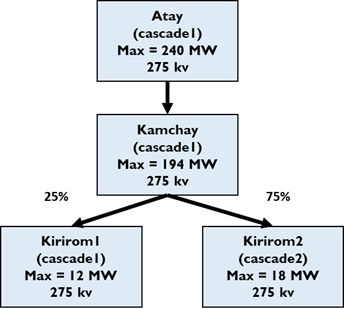

In [18]:
import os
from IPython.display import Image, display
from pownet.folder_utils import get_pownet_dir

project_root = get_pownet_dir()
image_path = os.path.join(project_root, "images", "complex_river.png")
display(Image(filename=image_path))

## Setup: Input/Output Folders

First, we specify the directory containing the input data using `input_folder`. If simulation results need to be saved, we also define the `output_folder`. PowNet requires the following CSV files:

- `reservoir_unit.csv` contains information on the characteristics of reservoirs
- `inflow.csv` contains the daily inflow to each reservoirs
- `minimum_flow.csv` contains the daily minimum flow from each reservoirs
- `flow_paths.csv` contains the system topology -- the water flow paths

This code block imports the ReservoirManager and defines essential paths. It sets up the input_folder where PowNet will look for model data (e.g., CSV files for the 'complex_river' model) and an output_folder for saving simulation results. Note: If PowNet was installed via pip, or if your data resides in a different location, you may need to adjust the input_folder path accordingly.

In [19]:
import os
from pownet.reservoir import ReservoirManager

input_folder = os.path.join(project_root, "model_library")
output_folder = os.path.join(project_root, "outputs")

# Define the specific model name
model_name = "complex_river"
input_folder = os.path.join(input_folder, model_name)

## Reservoir simulation

The operation of downstream reservoirs is influenced by the operations of those upstream. The `ReservoirManager` class orchestrates the simulation sequence, commencing with the most upstream reservoirs and progressing downstream. The subsequent code block demonstrates loading reservoir parameters from the previously defined CSV files and executing a simulation to generate time-series data of reservoir dynamics (e.g., water levels, flow, hydropower generation).

Here, we initialize the `ReservoirManager`, load the reservoir characteristics and system topology from CSV files located in the `input_folder`, and then run the reservoir simulation based on the loaded data and predefined operational rules.

In [20]:
reservoir_manager = ReservoirManager()
reservoir_manager.load_reservoirs_from_csv(input_folder)
reservoir_manager.simulate()

After the simulation, we retrieve the simulated daily hydropower generation time series for all reservoirs as a pandas DataFrame. We then display the first 5 days of this data, rounded to the nearest whole number, for a quick review.

In [21]:
hydropower_df = reservoir_manager.get_hydropower_ts()
hydropower_df.round(0).head()

,atay,kamchay,kirirom1,kirirom2
1,752.0,569.0,288.0,432.0
2,1804.0,1423.0,288.0,432.0
3,1796.0,1406.0,288.0,432.0
4,1788.0,1396.0,288.0,432.0
5,1779.0,1384.0,288.0,432.0


Finally, to visualize the results for a specific reservoir, we access the 'atay' reservoir object from the ReservoirManager and then generate and display a plot summarizing its state variables (e.g., water level, inflow, outflow, generation) over the simulation period. Of course, we can do this for the other three reservoirs as well.

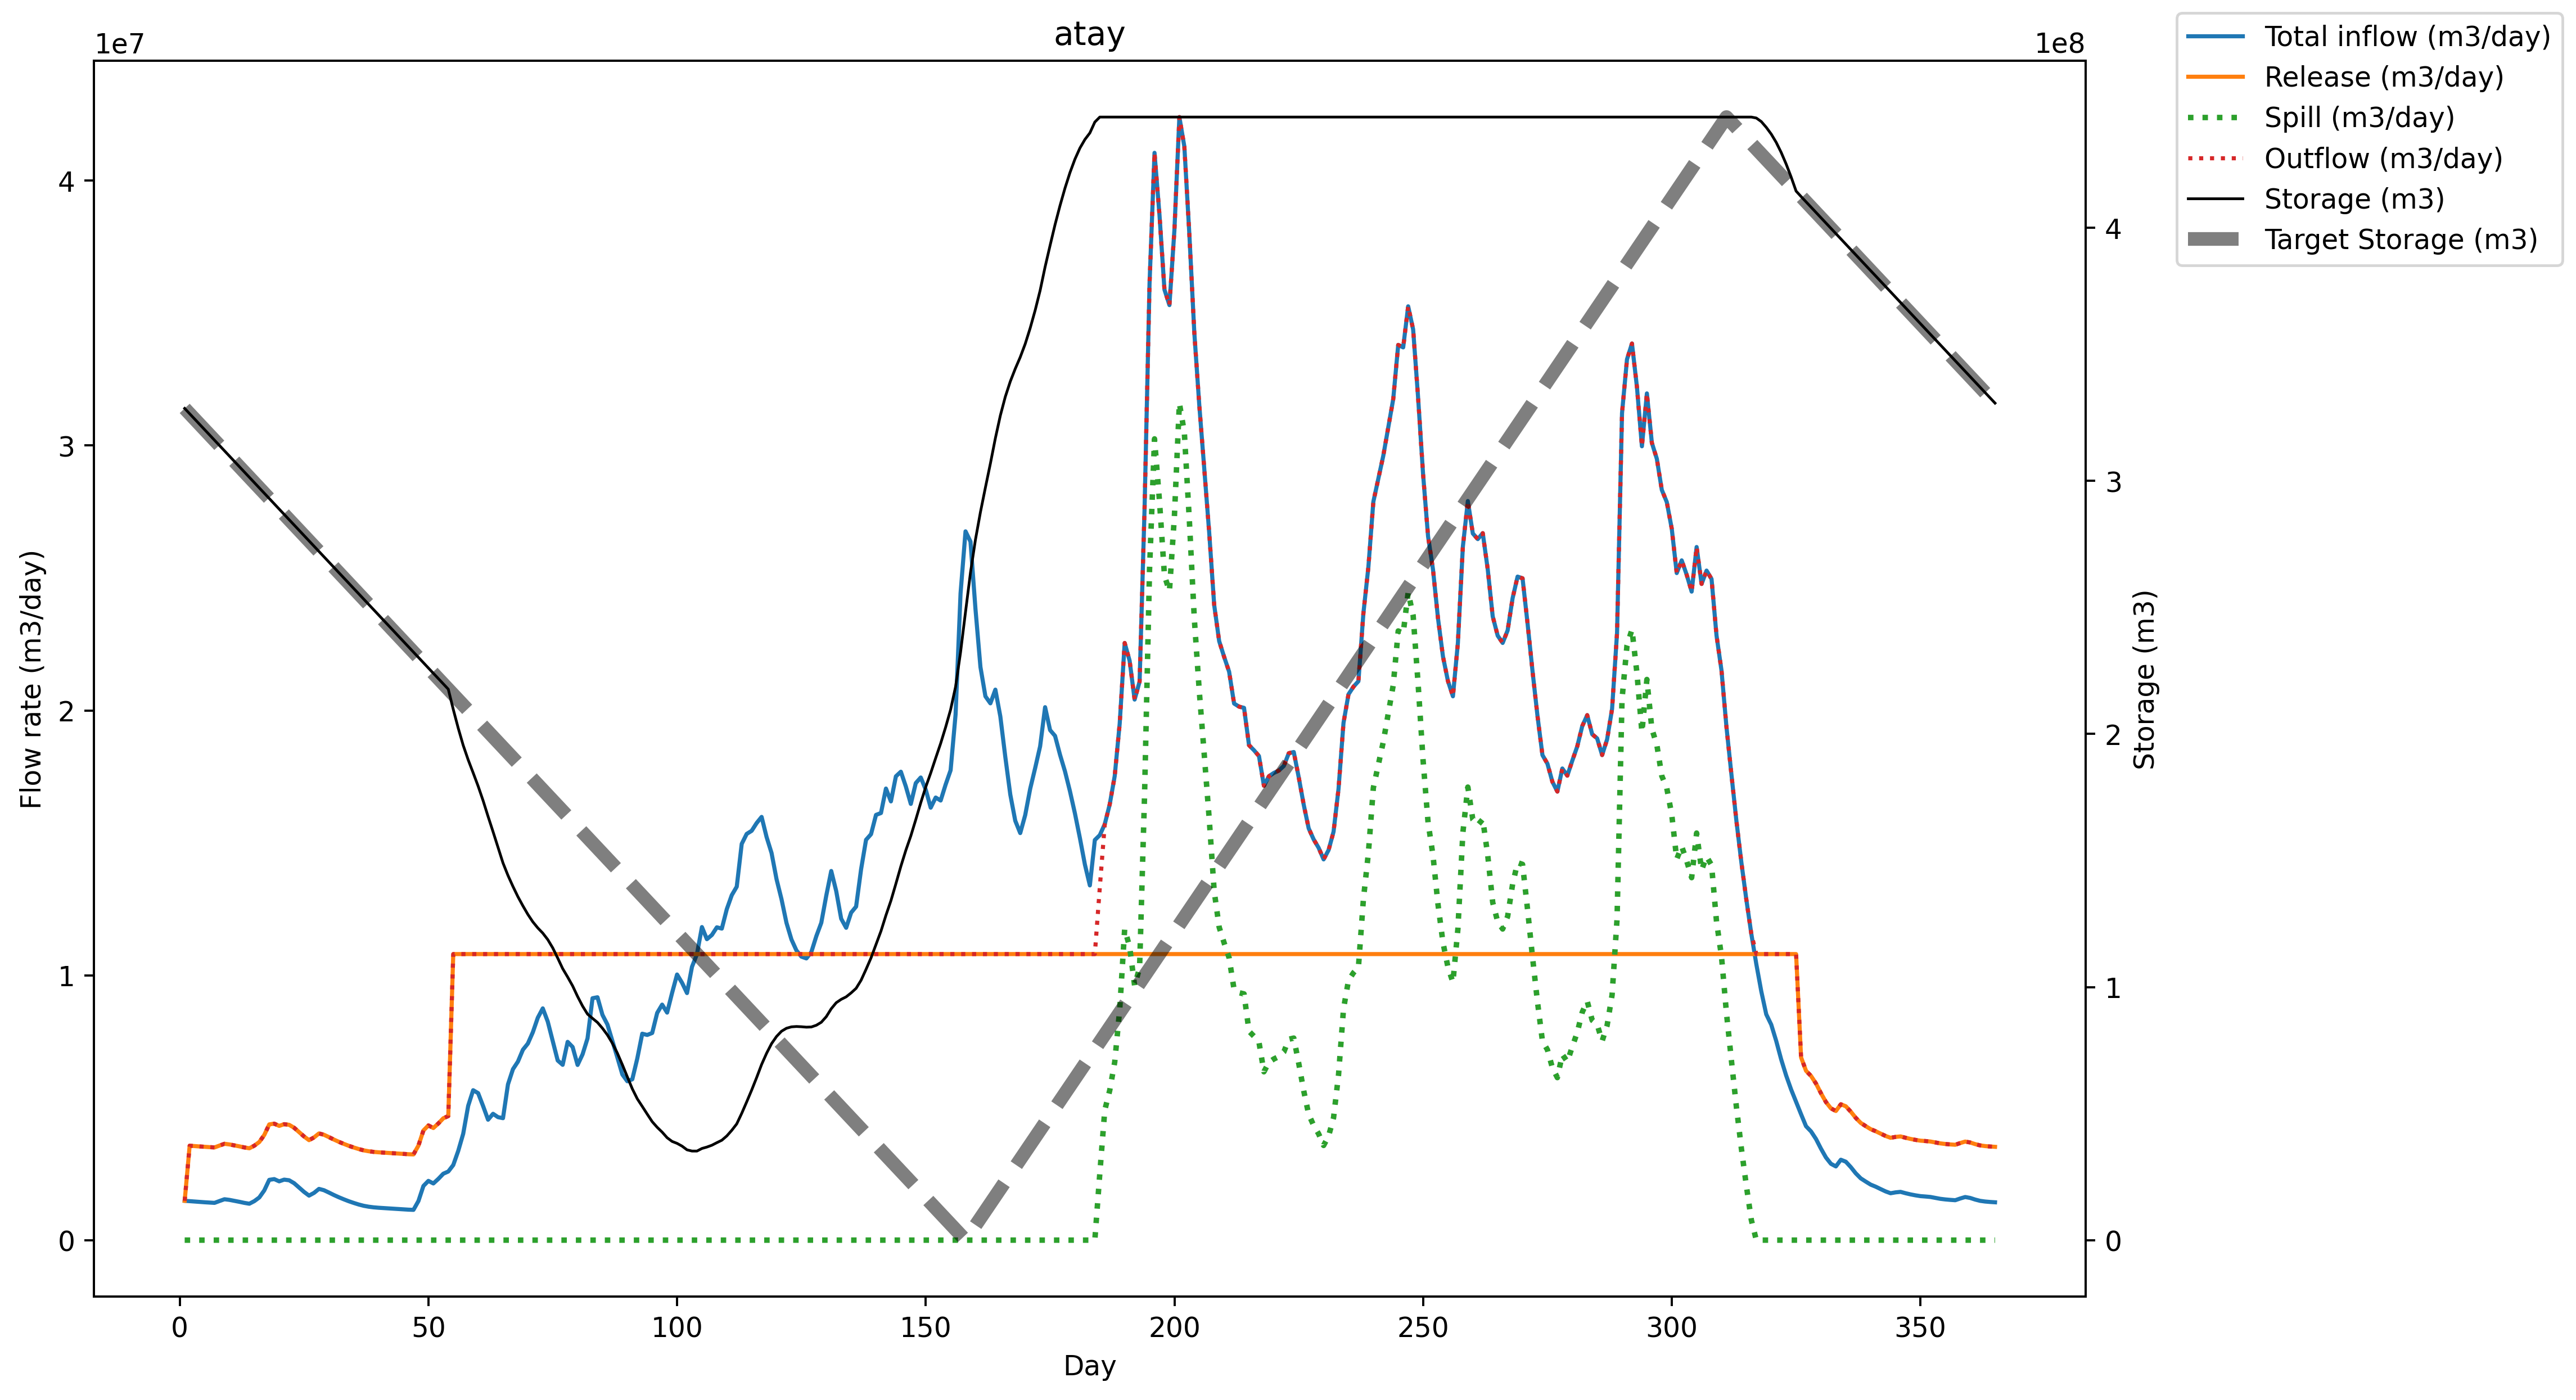

In [22]:
atay_reservoir = reservoir_manager.reservoirs["atay"]
atay_reservoir.plot_state() # Include the output_folder argument if you want to save the plot